# Box plot

- boxlot is used to identify the out_liers 
- outlier is a observation having huge +ve value or huge -ve value
- q1 = 25p , q2 = 50p and q3 = 75p
- IQR = inter quartile range = q3-q1
- q3+1.5*IQR and q1-1.5*IQR

           Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR

                       |-----:-----|
       o      |--------|     :     |--------|    o  o
                       |-----:-----|
                       
     flier             <----------->            fliers
                            IQR

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
path=r"C:\Users\LENOVO\Documents\Naresh IT\Datafiles\Visadataset.csv"

In [7]:
visa_df=pd.read_csv(path)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [4]:
cat_listt=visa_df.select_dtypes(include='object').columns
num_listt=visa_df.select_dtypes(exclude='object').columns


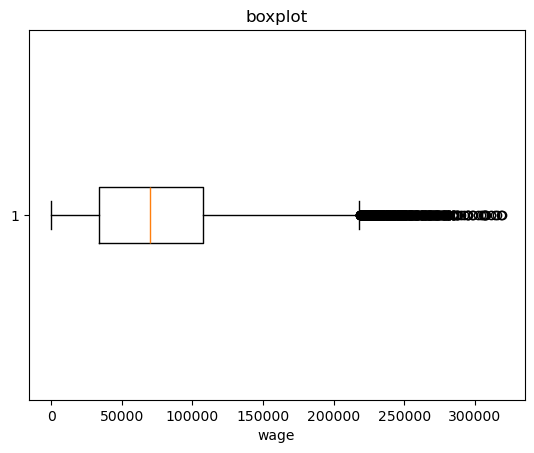

In [5]:
wage_data=visa_df['prevailing_wage']
plt.boxplot(wage_data,vert=False)
plt.title('boxplot')
plt.xlabel('wage')
plt.show()

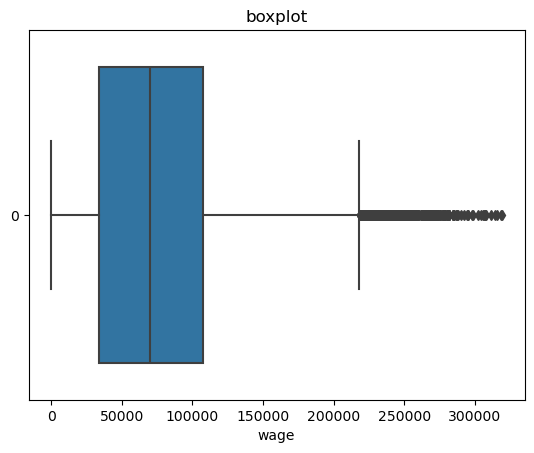

In [6]:
wage_data=visa_df['prevailing_wage']
sns.boxplot(wage_data,orient='h')
plt.title('boxplot')
plt.xlabel('wage')
plt.show()

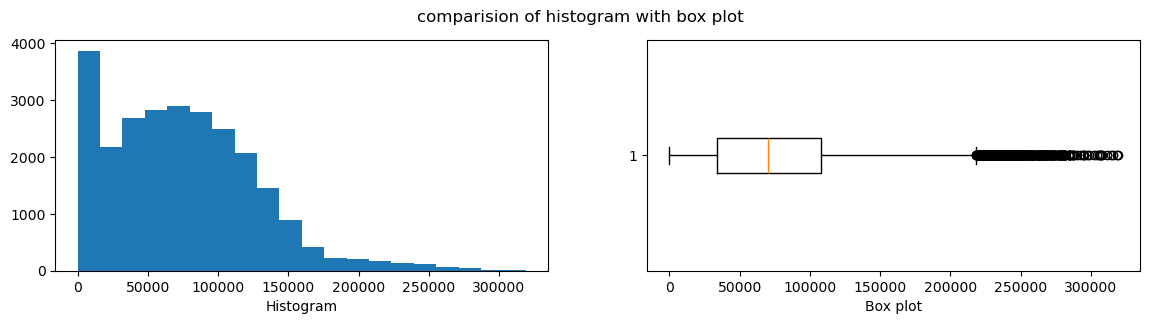

In [7]:
wage_data=visa_df['prevailing_wage']
plt.figure(figsize=(14,3))
plt.suptitle('comparision of histogram with box plot')
plt.subplot(1,2,1).hist(wage_data,bins=20)
#plt.hist(wage_data,bins=20)
plt.xlabel('Histogram')
plt.subplot(1,2,2).boxplot(wage_data,vert=False)

#plt.boxplot(wage_data,vert=False)
plt.xlabel('Box plot')
plt.show()


**Finding the outliers**
- we already know that outliers available less than
- **q1-1.5*IQR** and **q3+1.5*IQR**
- step-1: 

In [8]:
wage_data=visa_df['prevailing_wage']
q1=np.percentile(wage_data,25)
q2=np.percentile(wage_data,50)
q3=np.percentile(wage_data,75)

iqr=q3-q1

lb=q1-1.5*iqr
ub=q3+1.5*iqr

con1 = wage_data < lb
con2 = wage_data > ub
con3 = con1 | con2
outliers_data=wage_data[con3]
outliers_data

14       220081.73
34       225569.73
130      247393.01
216      269321.68
221      219529.62
           ...    
25191    280482.51
25195    234308.77
25468    272715.74
25469    273772.47
25476    279174.79
Name: prevailing_wage, Length: 427, dtype: float64

In [9]:
outliers_df=visa_df[con3]
outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


- we have two dataframe

- Visa_df: Total data 25480

- non_outliers_df= After removing outliers 25053

- first plot nonoutliers data prewaling wage hsitogram and boxplot

In [10]:
wage_data=visa_df['prevailing_wage']
q1=np.percentile(wage_data,25)
q2=np.percentile(wage_data,50)
q3=np.percentile(wage_data,75)

iqr=q3-q1

lb=q1-1.5*iqr
ub=q3+1.5*iqr

con1 = wage_data > lb
con2 = wage_data < ub
con3 = con1 & con2
non_outlier_df=visa_df[con3]
non_outlier_df


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


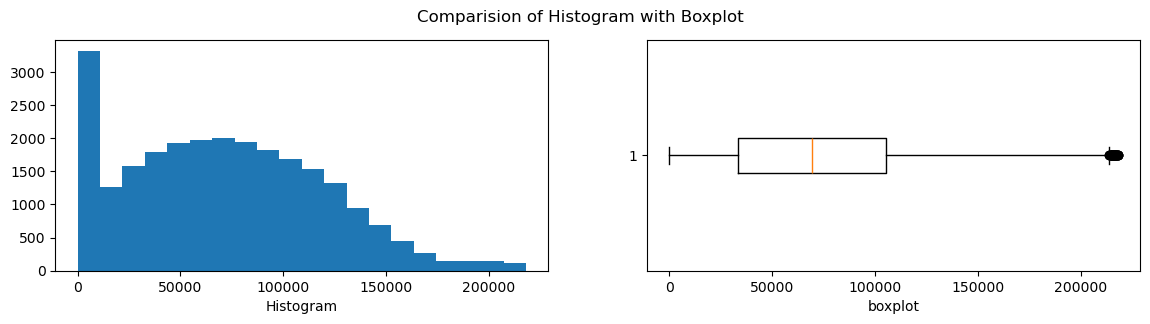

In [11]:
wage_data_non_outliers=non_outlier_df['prevailing_wage']
plt.figure(figsize=(14,3))
plt.suptitle('Comparision of Histogram with Boxplot')
plt.subplot(1,2,1).hist(wage_data_non_outliers,bins=20)
plt.xlabel('Histogram')
plt.subplot(1,2,2).boxplot(wage_data_non_outliers,vert=False)
plt.xlabel('boxplot')
plt.show()

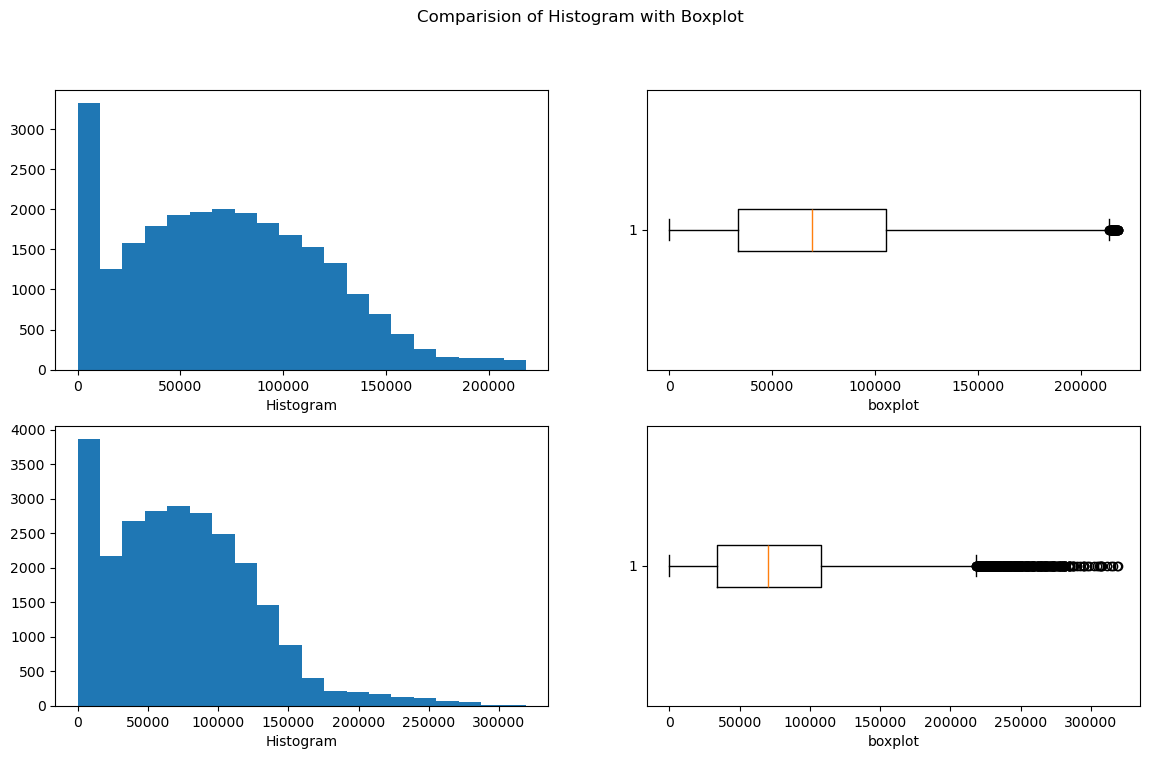

In [12]:
################### data #######################################
wage_data_non_outliers=non_outlier_df['prevailing_wage']
wage_data=visa_df['prevailing_wage']
################# Non outliers###################################### 
plt.figure(figsize=(14,8))
plt.suptitle('Comparision of Histogram with Boxplot')
plt.subplot(2,2,1).hist(wage_data_non_outliers,bins=20)
plt.xlabel('Histogram')
plt.subplot(2,2,2).boxplot(wage_data_non_outliers,vert=False)
plt.xlabel('boxplot')
###################### Entire data ################################
plt.subplot(2,2,3).hist(wage_data,bins=20)
plt.xlabel('Histogram')
plt.subplot(2,2,4).boxplot(wage_data,vert=False)
plt.xlabel('boxplot')
plt.show()

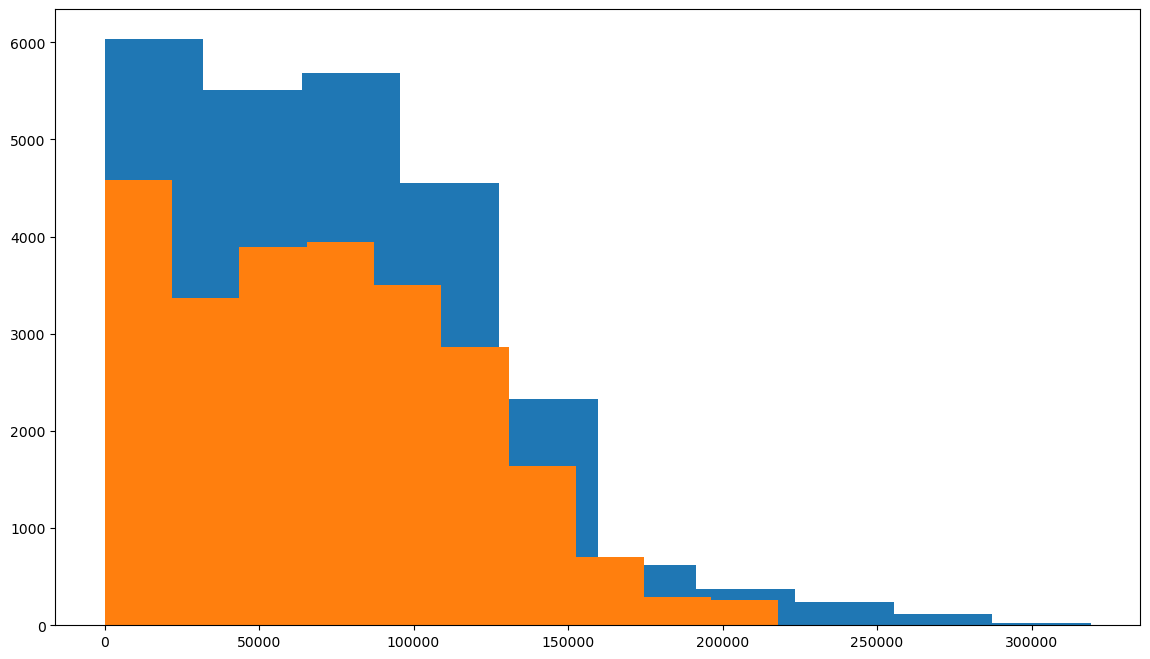

In [13]:
wage_data_non_outlier=non_outlier_df['prevailing_wage']
wage_data=visa_df['prevailing_wage']
plt.figure(figsize=(14,8))
plt.hist(wage_data)
plt.hist(wage_data_non_outlier)
plt.show()

# how to deal with outliers
**How to deal outliers**

- 1. We can drop the outliers
 
     - Droping outliers is an easy task, but not recomended
    
     - If you drop the outliers we are droping the rows
    
     - which means we are droping the other column values also
    
     - May be some important information we might loose from other column values
    
     - But in industry if outliser percentage less than 2% of the total data, we can drop
    
     - The number of outliers in pwage is 427
    
     - The number of total observations are 25480
    
     - The percentage is 1.67 which is less than 2%

- 2. Fill with Median value
 
     - We already know that outliers does not affect by median
    
     - so it is the best practice to fill the outliers with median
    
- 3. Capping or Flooring
 
     - Instead of fill with median
    
     - We can fill with certian values
    
     - the outliers which are less than LB fill with LB value
    
     - the outliers which are greater than UB fill with UB value
    
- **Isolation Forest**

  - Is ML model used to find the Outliers and anamolies 


**fill with median value**

In [14]:
import numpy as np
import pandas as pd


wage_data = visa_df['prevailing_wage']

q1 = np.percentile(wage_data, 25)
q2 = np.percentile(wage_data, 50)  
q3 = np.percentile(wage_data, 75)

iqr = q3 - q1

lb = q1 - 1.5 * iqr
ub = q3 + 1.5 * iqr

outliers = (wage_data < lb) | (wage_data > ub)

#wage_data[outliers] = q2

visa_df['prevailing_wage'] = wage_data

print(visa_df['prevailing_wage'])

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64


**np.where**

- in numpy we have method called where
- it takes 3 argument
- 1.condition
- 2.valueif condition is true
- 3.value if condition is false
- it is applicable for only binary means if and else 

In [15]:
# list1=[]
# for value in wage_data:
#     if value < lb or value > ub:
#         median=wage_data.median()
#         list1.append(median)
#     else:
#         list1.append(value)

In [16]:
dict1={'sub': ['ds','ml','dl'] ,
       'mark':[100,200,300]}
df = pd.DataFrame(dict1)
df

,sub,mark
0,ds,100
1,ml,200
2,dl,300


In [17]:
# Qn: I want to replace marks with 1 , which are greater than 100
dict1={'Sub':['DS','DE','CS'],
   'marks':[100,200,300]}
df=pd.DataFrame(dict1)
df

l=[]
for i in df['marks']:
    if i>100:
        l.append(1)
    else:
        l.append(i)
df['marks']=l
df

,Sub,marks
0,DS,100
1,DE,1
2,CS,1


In [18]:
dict1={'Sub':['DS','DE','CS'],
   'marks':[100,200,300]}
df=pd.DataFrame(dict1)
df

,Sub,marks
0,DS,100
1,DE,200
2,CS,300


In [19]:
# np.where(<condition>,<True>,<False>)
con=df['marks']>100
l=np.where(con,1,df['marks'])
df['marks']=l
df

,Sub,marks
0,DS,100
1,DE,1
2,CS,1


In [20]:
#Implement for the outliers
wage_data=visa_df['prevailing_wage']
con1= wage_data<lb
con2= wage_data>ub
con= con1 | con2
wage_med=wage_data.median()
l=np.where(con,wage_med,wage_data)
l

array([   592.2029,  83425.65  , 122996.86  , ..., 146298.85  ,
        86154.77  ,  70876.91  ])

In [21]:
visa_df['prevailing_wage_update']=l

(array([4580., 3368., 3890., 4369., 3507., 2860., 1643.,  706.,  295.,
         262.]),
 array([2.13670000e+00, 2.18113840e+04, 4.36206314e+04, 6.54298787e+04,
        8.72391260e+04, 1.09048373e+05, 1.30857621e+05, 1.52666868e+05,
        1.74476115e+05, 1.96285363e+05, 2.18094610e+05]),
 <BarContainer object of 10 artists>)

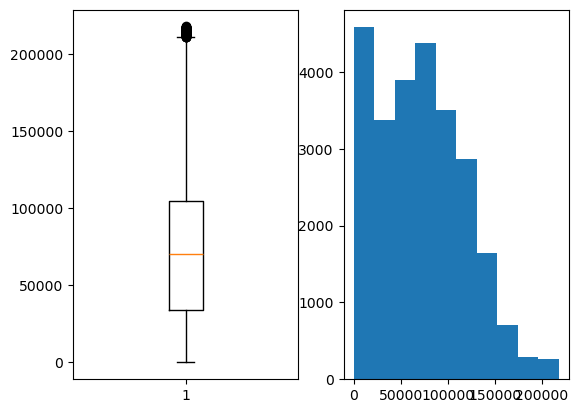

In [22]:
plt.subplot(1,2,1).boxplot(visa_df['prevailing_wage_update'])
plt.subplot(1,2,2).hist(visa_df['prevailing_wage_update'])

**Bi variate analysis**

- We already seen Uni variate analysis

- We performed the categorical columns analysis

    - Frequency table (Value counts)

    - Bar chart

    - Relative frequency table (Value counts Normalized form)

    - Pie chart

- We performed the numerical column analysis

    - Histogram

    - Distribution plots

    - Box plot

    - Outlier analysis

    - Filling the outliers

- Now we will do Categorical-Categorical Analaysis

- Numerical - Numerical analayis

- Categorical - Numerical analysis

**categorical - categorical**

- lets consider two column
   - continent
   - case status

In [23]:
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [24]:
visa_df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

**task**

- find the certified observations continent wise
- find the denied observation continent wise

In [25]:
# Step-1: Make the first condition Continet=='Asia'
# Step-2: Make the second condition case_status=='Certified'
# Step-3: Make the Third condition: con1&con2
# Step-4: Then retrive the dataframe and take the count
con1=visa_df['continent']=='Asia'
con2=visa_df['case_status']=='Certified'
con3=con1&con2
len(visa_df[con3])

11012

In [26]:
visa_df['continent'].unique()
visa_df['continent'].value_counts().keys()  #  what ever you use in for lop

Index(['Asia', 'Europe', 'North America', 'South America', 'Africa',
       'Oceania'],
      dtype='object', name='continent')

In [27]:
count1=[]
for i in visa_df['continent'].unique():
    
    con1=visa_df['continent']==i
    con2=visa_df['case_status']=='Certified'
    con3=con1&con2
    count1.append(len(visa_df[con3]))
count1

[11012, 397, 2037, 2957, 493, 122]

In [28]:
count2=[]
for i in visa_df['continent'].unique():
    
    con1=visa_df['continent']==i
    con2=visa_df['case_status']=='Denied'
    con3=con1&con2
    count2.append(len(visa_df[con3]))
count2

[5849, 154, 1255, 775, 359, 70]

In [29]:
col=['Certified','Denied']
df1=pd.DataFrame(zip(count1,count2),index=visa_df['continent'].unique(),columns=col)
df1

,Certified,Denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


In [30]:
visa_df['continent'][visa_df['case_status']=='Certified'].value_counts()

continent
Asia             11012
Europe            2957
North America     2037
South America      493
Africa             397
Oceania            122
Name: count, dtype: int64

**Cross tab**

- The above data frame we can make by using a method: **cross tab**

- It is available in pandas 

- It takes two argumenst

    - index 

    - column

- In above data frame index column is : **continent**

- In above data frame Data column is : **case_status** 

In [31]:
df4=pd.crosstab(visa_df['continent'],visa_df['case_status'])
df4

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<Axes: xlabel='continent'>

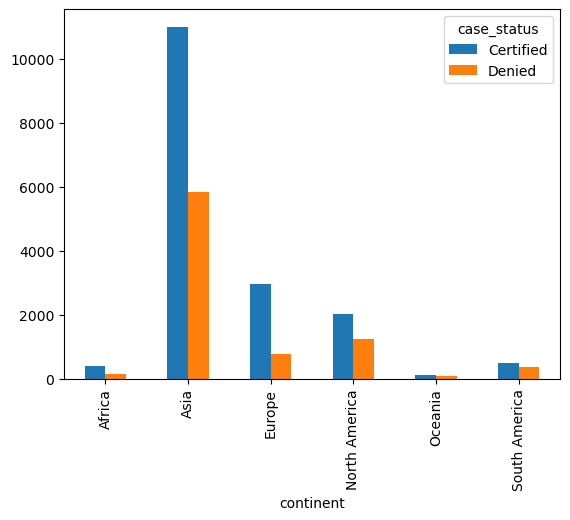

In [32]:
df4.plot(kind='bar')

**Multivariate analysis**

- Education

- continent

- Case status

- we already know from Asia there 11k Accepted visa

- In that I want furthur break down based on education

- here also pd.cross tab

    - first fix your index of any one column out of three column

    - Then keep two column in a list and pass as data column

In [33]:
data_column=[visa_df['case_status'],visa_df['education_of_employee']]
df5=pd.crosstab(visa_df['continent'],data_column)
df5

case_status            Certified                                    Denied  \
education_of_employee Bachelor's Doctorate High School Master's Bachelor's   
continent                                                                    
Africa                        81        43          23      250         62   
Asia                        4407       780         676     5149       2761   
Europe                      1040       788         162      967        259   
North America                641       207         210      979        584   
Oceania                       38        19          19       46         28   
South America                160        75          74      184        173   

case_status                                           
education_of_employee Doctorate High School Master's  
continent                                             
Africa                       11          43       38  
Asia                        143        1614     1331  
Europe                       58         328      130  
North America                51         191      429  
Oceania                       3          17       22  
South America                14          63      109

<Axes: xlabel='continent'>

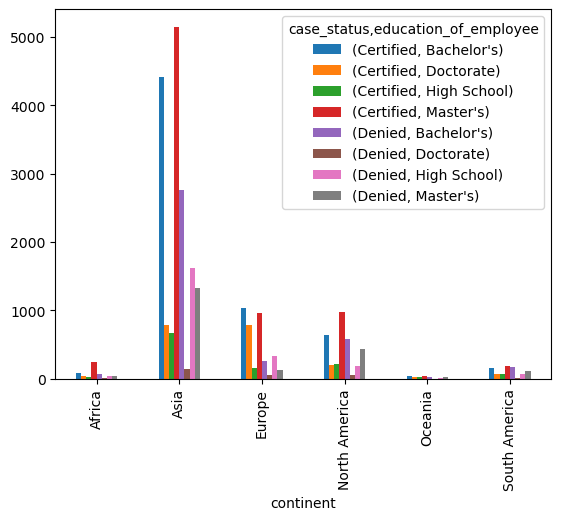

In [34]:
df5.plot(kind='bar')

In [35]:
cat_column=visa_df.select_dtypes(include='object').columns
num_column=visa_df.select_dtypes(exclude='object').columns

In [36]:
num_column

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage',
       'prevailing_wage_update'],
      dtype='object')

**Numerical vs Numerical**

- to understand numrical columns relation we need to plot scatter plots
- scatter plot gives the relation between two numericalcolumn
- bar chart- piechart- histogram- scatter plots
- scatter plot under matplotlib package
- **plt.scatter**

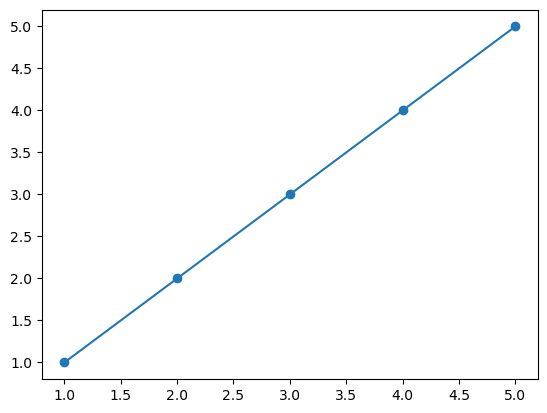

In [37]:
x=[1,2,3,4,5]
y=[1,2,3,4,5]
plt.scatter(x,y)
plt.plot(x,y)

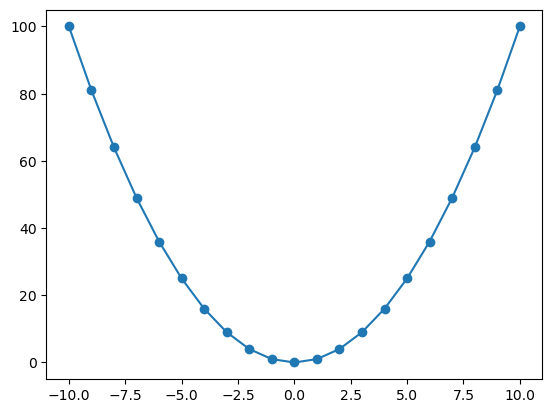

In [38]:
x=[i for i in range(-10,11)]
y=[i*i for i in x]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

In [39]:
pd.DataFrame(zip(x,y))

,0,1
0,-10,100
1,-9,81
2,-8,64
3,-7,49
4,-6,36
5,-5,25
6,-4,16
7,-3,9
8,-2,4
9,-1,1


In [43]:
# step-1: read one numerical column
# step-2: read another numerical column
# apply the scatter plot

Text(0, 0.5, 'prevailing_wage')

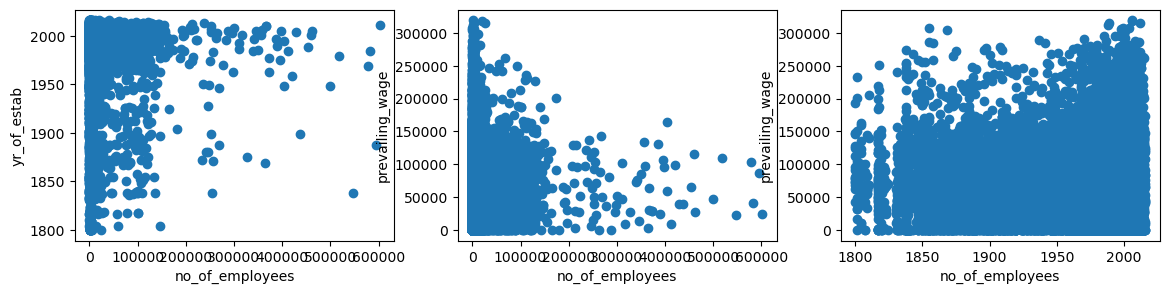

In [44]:
col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
col3=visa_df['prevailing_wage']
plt.figure(figsize=(14,3))
plt.subplot(1,3,1).scatter(col1,col2)
plt.xlabel('no_of_employees')
plt.ylabel('yr_of_estab')
########################################
plt.subplot(1,3,2).scatter(col1,col3)
plt.xlabel('no_of_employees')
plt.ylabel('prevailing_wage')
######################################
plt.subplot(1,3,3).scatter(col2,col3)
plt.xlabel('no_of_employees')
plt.ylabel('prevailing_wage')

In [45]:
# Mean deviation
# Absolute mean deviation
# Variance
# Covarianec
# Correlation coeffiecient

- Implement the Covariance function

- Covariance vs Correlation

    - Covariance will tell about the columns have relation or not

    - Covariance will explain about relation status 

        - postive relation

        - neagtive relation

        - no relation

    - Correlation tells about how much relation between two variables

    - It denotes with 'r'

    - r varies from -1 to 1

    - -1 to 0 indicates negative relation quantity

    - 0 to 1 indicates postive relation quantity

    - 0 indicates no relation


<img class="XqHOTb IGEbUc" alt="r =\frac{\sum\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sqrt{\sum\left(x_{i}-\bar{x}\right)^{2} \sum\left(y_{i}-\bar{y}\right)^{2}}}" src="https://www.gstatic.com/education/formulas2/553212783/en/correlation_coefficient_formula.svg" role="img" data-csiid="ZDK8ZqXdMeWN4-EPu63cgQI_13" data-atf="0">

**method name : corr**

In [47]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage,prevailing_wage_update
no_of_employees,1.000000,-0.017770,-0.009523,-0.006762
yr_of_estab,-0.017770,1.000000,0.012342,0.015885
prevailing_wage,-0.009523,0.012342,1.000000,0.900557
prevailing_wage_update,-0.006762,0.015885,0.900557,1.000000


**Heat_Map**
- one of the important visualization method to show the materx from of value
- it is under seaborn packge
- in everey matrix we have highest value and lowest value will be there
- Hit map will give colour visualization
- also it prvides colour bar 

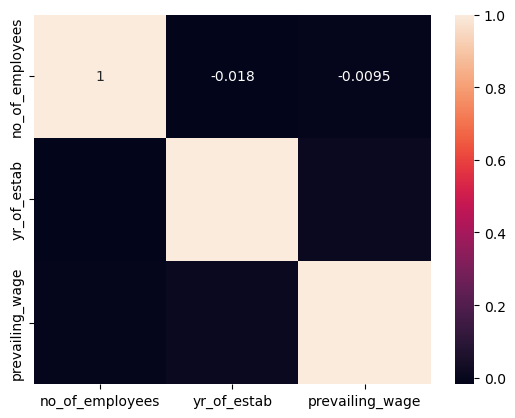

In [8]:
corr_data=visa_df.corr(numeric_only=True)
sns.heatmap(corr_data,annot=True)
plt.show()

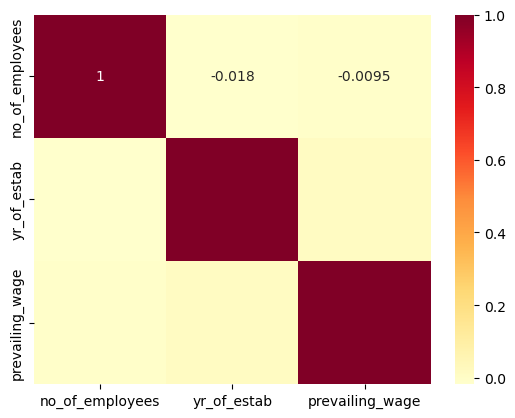

In [9]:
corr_data=visa_df.corr(numeric_only=True)
sns.heatmap(corr_data,annot=True,cmap='YlOrRd')
plt.show()